Unsupervised Learning and Preprocessing
===

*Unsupervised transformations* - create new representations of the data, which may be easier for humans or ML algorithms to understand.  A common application is dimensionality reduction, which takes a high-dimensional representation of the data, and finds a new way to summarize the essential characteristics (think reducing to 2-dimensions for visualization).  Another application is finding components as in topic extraction on collections of text documents.

*Clustering algorithms* - partition data into distinct groups of similar items.

Challenges
---

One major challenge is evaluating whether the algorithm learned something useful, hard to say if the model "did well" because there is no right answer.  There are many ways to cluster that may not be clustering on what we're looking for, and there is no way to "tell" the algorithm what we're looking for.

Preprocessing and Scaling
---

Some algorithms, like NN and SVM, are very sensitive to the scaling of the data and require simple, per-feature rescaling and shift of the data.

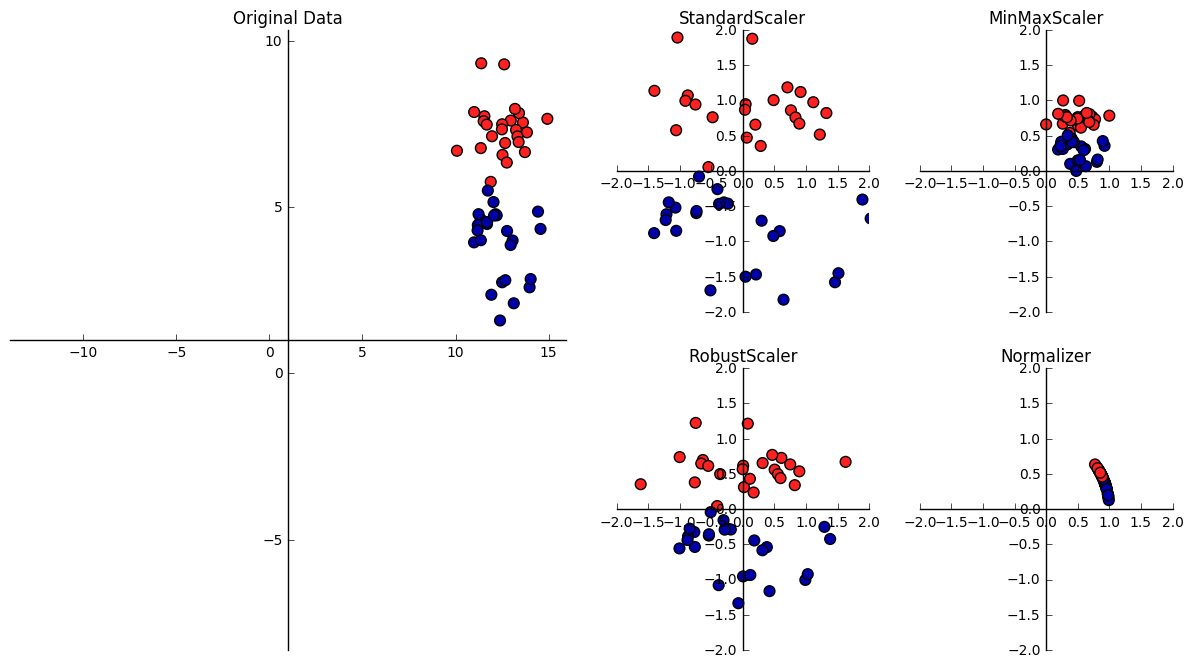

In [2]:
%matplotlib inline
import mglearn

mglearn.plots.plot_scaling()

The first plot shows a two-class classification dataset with two features: x between 10-15 and y between 1-9.

*`StandardScaler`* - each feature will have mean of 0 and variance of 1.  Does not ensure a certain min/max.
*`RobustScaler`* - similar to standard scaler, but uses median and quartiles instead of mean and variance.  Ignores outliers.
*`MinMaxScaler`* - all features between 0 and 1.
*`Normalizer`* - each data point scaled to have a euclidean distance of 1 (projects the data onto a sphere of radius 1).  Normalization is done when only direction or angle of the data matters, not the length of the feature vector.

Using the MinMax Scaler with a kernel SVM:

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

print("transformed shape: {}".format(X_train_scaled.shape))

print("per-feature min before scaling: {}".format(X_train.min(axis=0)))
print("per-feature max before scaling: {}".format(X_train.max(axis=0)))

print("per-feature min after scaling: {}".format(X_train_scaled.min(axis=0)))
print("per-feature max after scaling: {}".format(X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature min before scaling: [  6.98100000e+00   9.71000000e+00   4.37900000e+01   1.43500000e+02
   5.26300000e-02   1.93800000e-02   0.00000000e+00   0.00000000e+00
   1.06000000e-01   5.02400000e-02   1.15300000e-01   3.60200000e-01
   7.57000000e-01   6.80200000e+00   1.71300000e-03   2.25200000e-03
   0.00000000e+00   0.00000000e+00   9.53900000e-03   8.94800000e-04
   7.93000000e+00   1.20200000e+01   5.04100000e+01   1.85200000e+02
   7.11700000e-02   2.72900000e-02   0.00000000e+00   0.00000000e+00
   1.56600000e-01   5.52100000e-02]
per-feature max before scaling: [  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   2.86700000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.57500000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   6.14600000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+01   2.5120

In [13]:
X_test_scaled = scaler.transform(X_test)

print("per-feature min before scaling: {}".format(X_test.min(axis=0)))
print("per-feature max before scaling: {}".format(X_test.max(axis=0)))

print("per-feature min after scaling: {}".format(X_test_scaled.min(axis=0)))
print("per-feature max after scaling: {}".format(X_test_scaled.max(axis=0)))

per-feature min before scaling: [  7.69100000e+00   1.03800000e+01   4.83400000e+01   1.70400000e+02
   6.82800000e-02   3.11600000e-02   0.00000000e+00   0.00000000e+00
   1.36500000e-01   4.99600000e-02   1.11500000e-01   3.87100000e-01
   8.48400000e-01   7.22800000e+00   2.86600000e-03   3.74600000e-03
   0.00000000e+00   0.00000000e+00   7.88200000e-03   1.08700000e-03
   8.67800000e+00   1.42000000e+01   5.44900000e+01   2.23600000e+02
   8.77400000e-02   5.13100000e-02   0.00000000e+00   0.00000000e+00
   1.56500000e-01   5.50400000e-02]
per-feature max before scaling: [  2.72200000e+01   3.38100000e+01   1.82100000e+02   2.25000000e+03
   1.42500000e-01   3.45400000e-01   3.75400000e-01   1.87800000e-01
   2.90600000e-01   9.74400000e-02   1.29200000e+00   2.61200000e+00
   1.01200000e+01   1.58700000e+02   1.60400000e-02   1.00600000e-01
   3.03800000e-01   3.32200000e-02   7.89500000e-02   1.22000000e-02
   3.31200000e+01   4.17800000e+01   2.20800000e+02   3.21600000e+03
   

Test set may not be scaled between 0 and 1 because the exact same transformation is applied to the test set as was applied to the training set (always subtracts the training set minimum and divides by the training set range).

You can fit and transform in a single-step using an optimized method:

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_train)

Comparing accuracies using scaled and unscaled data
---

In [16]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)

print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.63


In [17]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

print("Scaled test set accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


In [19]:
scaler = StandardScaler() # only line to change from above, illustrates how easy it is to swap scalers
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

print("Scaled test set accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.96
